In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import pandas as pd
import nltk
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [25]:
new_df=pd.read_csv('/kaggle/input/twitter/train1.csv')
new_df.dropna(axis=0,how='any',inplace=True)

In [26]:
new_df=new_df.drop(["date","flag","user","id"],axis=1).copy()

In [27]:
new_df['text_clean'] = new_df['text'].apply(lambda x: x.lower())


# Text processing

In [28]:
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}


In [29]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [30]:
new_df['text_clean'] = new_df['text_clean'].apply(lambda x: lookup_dict(x,apostrophe_dict))


In [31]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}


In [32]:
new_df['text_clean'] = new_df['text_clean'].apply(lambda x: lookup_dict(x,short_word_dict))


In [33]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}


In [34]:
new_df['text_clean'] = new_df['text_clean'].apply(lambda x: lookup_dict(x,emoticon_dict))

In [35]:
new_df['text_clean'] = new_df['text_clean'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))


In [36]:
new_df['text_clean'] = new_df['text_clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [37]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [38]:
new_df['text_clean'] = np.vectorize(remove_pattern)(new_df['text_clean'], "@[\w]*")

#Remove URL 

new_df['text_clean'] = new_df['text_clean'].apply(lambda x: remove_URL(x))

# Removing Punctuations, Numbers, and Special Characters
new_df['text_clean'] = new_df['text_clean'].str.replace("[^a-zA-Z#]", " ")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [39]:
def stopwords_remove(messeage):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(messeage)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
        
    return " ".join(filtered_sentence)
    

In [40]:
new_df["text_clean"]=new_df["text_clean"].apply(lambda x:stopwords_remove(x))

In [41]:
# Tokenization
tokenized_text =new_df["text_clean"].apply(lambda x: x.split())

stemmer = PorterStemmer()
tokenized_text1 = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

new_df["text_clean"]=tokenized_text1

for i in range(len(tokenized_text1)):
    tokenized_text1[i] = ' '.join(tokenized_text1[i])

new_df["text_clean"] = tokenized_text1

In [42]:
def text_process(message): # remove unnecessey values form the text columns
    message_proc = [char.lower() for char in message if (char not in string.punctuation) and (char not in string.digits)]
    message_proc = ''.join(message_proc)
#     print(message_proc)
    return message_proc


In [43]:
new_df["text_clean"]=new_df["text_clean"].apply(lambda x:text_process(x))

In [44]:
X=new_df["text_clean"]
Y=new_df.drop(['text_clean','text'],axis=1)

# spliting

In [140]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(X,Y,test_size=0.2,random_state=16,stratify=Y)

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tvectorizer = TfidfVectorizer()
X_train_vec = Tvectorizer.fit_transform(x_train)

# DR and Vectorization

In [142]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


lsa = make_pipeline(TruncatedSVD(n_components=500), Normalizer(copy=False))

X_lsa = lsa.fit_transform(X_train_vec)
explained_variance = lsa[0].explained_variance_ratio_.sum()
print(explained_variance)

0.3457282021074022


In [143]:
X_val_vec = Tvectorizer.transform(x_val)
X_val_vec=lsa.transform(X_val_vec)

# K-mean model

In [144]:
from sklearn.cluster import KMeans
kmean=KMeans(init="k-means++",n_clusters=2,tol=0.001,n_init=10,max_iter=80,algorithm='elkan')#“lloyd”, “elkan”, “auto”, “full”

In [145]:
kmean.fit(X_lsa)

KMeans(algorithm='elkan', max_iter=80, n_clusters=2, tol=0.001)

In [146]:
y_pred=kmean.predict(X_val_vec)

In [147]:
accuracy_score(y_val,y_pred)

0.5441162109375

In [148]:
accuracy_score(y_train,kmean.predict(X_lsa))

0.543392997305905

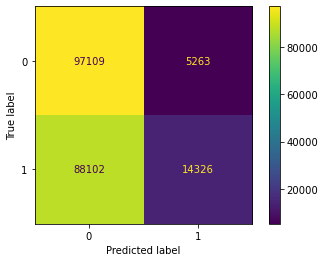

In [149]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [151]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.95      0.68    102372
           1       0.73      0.14      0.23    102428

    accuracy                           0.54    204800
   macro avg       0.63      0.54      0.46    204800
weighted avg       0.63      0.54      0.46    204800



# Out data

In [56]:
validation=pd.read_csv("/kaggle/input/validation/fulldata.csv")

In [57]:
data=pd.DataFrame()

In [58]:
data["target"]=validation.loc[:,"0"]

In [59]:
data["text"]=validation.iloc[:,-1]

In [60]:
data["text"] = data["text"].apply(lambda x: x.lower())

In [61]:
data["text"] = data["text"].apply(lambda x: lookup_dict(x,apostrophe_dict))

In [62]:
data["text"]= data["text"].apply(lambda x: lookup_dict(x,short_word_dict))


In [63]:
data["text"]= data["text"].apply(lambda x: lookup_dict(x,emoticon_dict))

In [64]:
data["text"] = data["text"].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

In [65]:
data["text"]= data["text"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [66]:
data["text"] = np.vectorize(remove_pattern)(data["text"], "@[\w]*")

#Remove URL 

data["text"] = data["text"].apply(lambda x: remove_URL(x))

# Removing Punctuations, Numbers, and Special Characters
data["text"] = data["text"].str.replace("[^a-zA-Z#]", " ")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [67]:
data["text"]=data["text"].apply(lambda x:stopwords_remove(x))

In [68]:
# Tokenization
tokenized_text =data["text"].apply(lambda x: x.split())

stemmer = PorterStemmer()
tokenized_text1 = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

data["text"]=tokenized_text1

for i in range(len(tokenized_text1)):
    tokenized_text1[i] = ' '.join(tokenized_text1[i])

data["text"]= tokenized_text1

In [69]:
data["text"]=data["text"].apply(lambda x:text_process(x))

In [70]:
X0=data["text"]
Y0=data["target"]

In [71]:
tt=Tvectorizer.transform(X0)
tt=lsa.transform(tt)

In [72]:
pp=kmean.predict(tt)

In [73]:
accuracy_score(Y0,pp)

0.483105

# WordCloud

### Posative

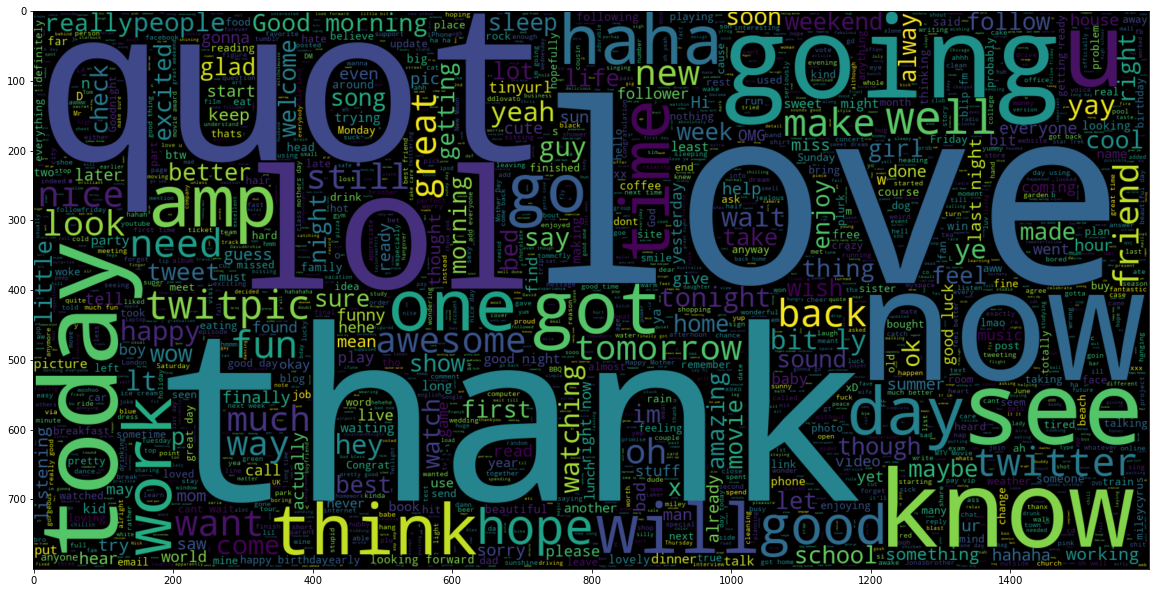

In [332]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(new_df[new_df.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

### Negative

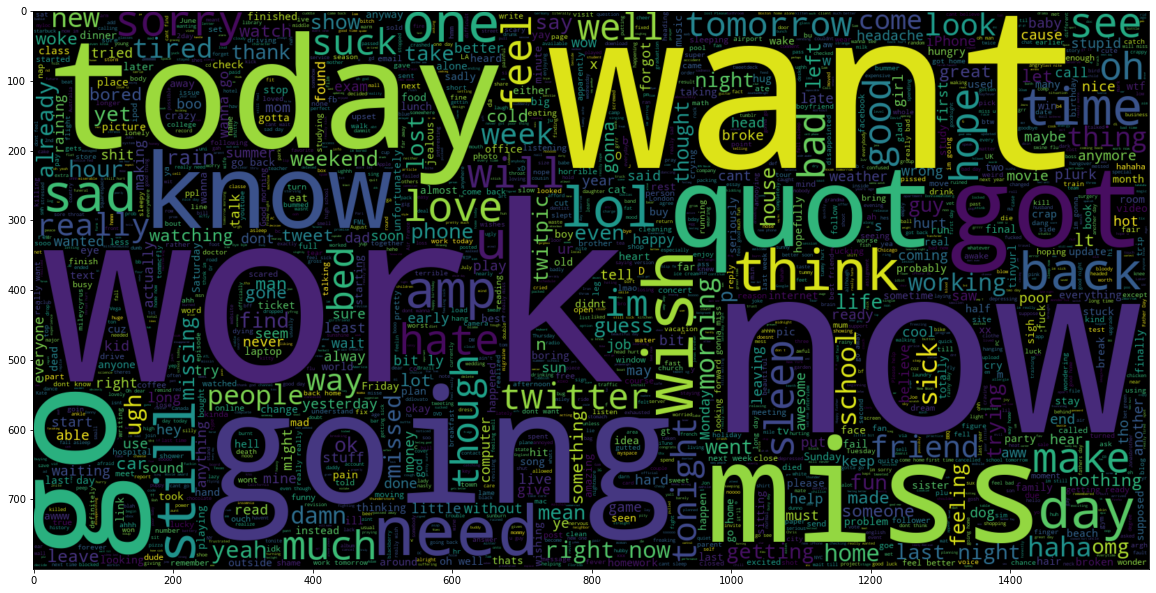

In [333]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(new_df[new_df.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

# Test

In [227]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def stopwords_remove(messeage):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(messeage)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
        
    return " ".join(filtered_sentence)

In [228]:
test=pd.read_csv('/kaggle/input/twitter/test1.csv')

In [229]:
test['text'] = test['text'].apply(lambda x: x.lower())


In [230]:
test['text'] = test['text'].apply(lambda x: lookup_dict(x,apostrophe_dict))


In [231]:
test['text'] = test['text'].apply(lambda x: lookup_dict(x,short_word_dict))


In [232]:
test['text'] = test['text'].apply(lambda x: lookup_dict(x,emoticon_dict))

In [233]:
test['text'] = test['text'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))


In [234]:
test['text'] =test['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [235]:

test['text'] = np.vectorize(remove_pattern)(test['text'], "@[\w]*")

#Remove URL 

test['text'] = test['text'].apply(lambda x: remove_URL(x))

# Removing Punctuations, Numbers, and Special Characters
test['text'] = test['text'].str.replace("[^a-zA-Z#]", " ")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [236]:
test['text']=test['text'].apply(lambda x:stopwords_remove(x))

In [237]:
# Tokenization
tokenized_text =test['text'].apply(lambda x: x.split())

stemmer = PorterStemmer()
tokenized_text1 = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

test['text']=tokenized_text1

for i in range(len(tokenized_text1)):
    tokenized_text1[i] = ' '.join(tokenized_text1[i])

test['text'] = tokenized_text1

In [238]:
test['text']=test['text'].apply(lambda x:text_process(x))

In [239]:
Id=test['id']

In [240]:
test=test.drop(["date","flag","user","id"],axis=1).copy()

In [241]:

X_test = Tvectorizer.transform(test['text'])

In [242]:

text_test=lsa.transform(X_test)

In [243]:
test_pred=kmean.predict(text_test)

In [244]:
final=pd.DataFrame()
test3=pd.read_csv('/kaggle/input/twitter/test1.csv')
Id=test3.iloc[:,-1]
final["id"]=Id
final["target"]=test_pred
final.to_csv("/kaggle/working/sub25.csv")

# Example text

In [96]:
ex=pd.DataFrame()
ex["orignal_text"]=["I would like to thank you guys, for your effort during this competition, especially thanks to Abdullah who already have a graduation project discussion to be with us until the end","for really I'm very sad ,because i can't join with you at presentation time."]
ex

,orignal_text
0,"I would like to thank you guys, for your effor..."
1,"for really I'm very sad ,because i can't join ..."


In [97]:
ex["lower"] = ex["orignal_text"].apply(lambda x: x.lower())
ex

,orignal_text,lower
0,"I would like to thank you guys, for your effor...","i would like to thank you guys, for your effor..."
1,"for really I'm very sad ,because i can't join ...","for really i'm very sad ,because i can't join ..."


In [98]:
ex["apostrophe_fix"] = ex["lower"].apply(lambda x: lookup_dict(x,apostrophe_dict))
ex

,orignal_text,lower,apostrophe_fix
0,"I would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor..."
1,"for really I'm very sad ,because i can't join ...","for really i'm very sad ,because i can't join ...","for really I am very sad ,because i cannot joi..."


In [99]:
ex["short_fix"]= ex["apostrophe_fix"].apply(lambda x: lookup_dict(x,short_word_dict))
ex

,orignal_text,lower,apostrophe_fix,short_fix
0,"I would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor..."
1,"for really I'm very sad ,because i can't join ...","for really i'm very sad ,because i can't join ...","for really I am very sad ,because i cannot joi...","for really I am very sad ,because i cannot joi..."


In [100]:
ex["emoticon_fix"]= ex["short_fix"].apply(lambda x: lookup_dict(x,emoticon_dict))
ex

,orignal_text,lower,apostrophe_fix,short_fix,emoticon_fix
0,"I would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor..."
1,"for really I'm very sad ,because i can't join ...","for really i'm very sad ,because i can't join ...","for really I am very sad ,because i cannot joi...","for really I am very sad ,because i cannot joi...","for really I am very sad ,because i cannot joi..."


In [101]:
ex["clean_tweet"] = ex["emoticon_fix"].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
ex

,orignal_text,lower,apostrophe_fix,short_fix,emoticon_fix,clean_tweet
0,"I would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...",i would like to thank you guys for your effor...
1,"for really I'm very sad ,because i can't join ...","for really i'm very sad ,because i can't join ...","for really I am very sad ,because i cannot joi...","for really I am very sad ,because i cannot joi...","for really I am very sad ,because i cannot joi...",for really I am very sad because i cannot joi...


In [102]:
ex["fix_lenght_word"]= ex["clean_tweet"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
ex

,orignal_text,lower,apostrophe_fix,short_fix,emoticon_fix,clean_tweet,fix_lenght_word
0,"I would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...",i would like to thank you guys for your effor...,would like to thank you guys for your effort d...
1,"for really I'm very sad ,because i can't join ...","for really i'm very sad ,because i can't join ...","for really I am very sad ,because i cannot joi...","for really I am very sad ,because i cannot joi...","for really I am very sad ,because i cannot joi...",for really I am very sad because i cannot joi...,for really am very sad because cannot join wit...


In [103]:
ex["removing_URL_Digits"] = np.vectorize(remove_pattern)(ex["fix_lenght_word"], "@[\w]*")

#Remove URL 

ex["removing_URL_Digits"]  = ex["removing_URL_Digits"] .apply(lambda x: remove_URL(x))

# Removing Punctuations, Numbers, and Special Characters
ex["removing_URL_Digits"] = ex["removing_URL_Digits"] .str.replace("[^a-zA-Z#]", " ")
ex

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


,orignal_text,lower,apostrophe_fix,short_fix,emoticon_fix,clean_tweet,fix_lenght_word,removing_URL_Digits
0,"I would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...",i would like to thank you guys for your effor...,would like to thank you guys for your effort d...,would like to thank you guys for your effort d...
1,"for really I'm very sad ,because i can't join ...","for really i'm very sad ,because i can't join ...","for really I am very sad ,because i cannot joi...","for really I am very sad ,because i cannot joi...","for really I am very sad ,because i cannot joi...",for really I am very sad because i cannot joi...,for really am very sad because cannot join wit...,for really am very sad because cannot join wit...


In [104]:
ex["remove_stopWord"]=ex["removing_URL_Digits"].apply(lambda x:stopwords_remove(x))
ex

,orignal_text,lower,apostrophe_fix,short_fix,emoticon_fix,clean_tweet,fix_lenght_word,removing_URL_Digits,remove_stopWord
0,"I would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...",i would like to thank you guys for your effor...,would like to thank you guys for your effort d...,would like to thank you guys for your effort d...,would like thank guys effort competition espec...
1,"for really I'm very sad ,because i can't join ...","for really i'm very sad ,because i can't join ...","for really I am very sad ,because i cannot joi...","for really I am very sad ,because i cannot joi...","for really I am very sad ,because i cannot joi...",for really I am very sad because i cannot joi...,for really am very sad because cannot join wit...,for really am very sad because cannot join wit...,really sad join presentation time


In [105]:
# Tokenization
tokenized_text =ex["remove_stopWord"].apply(lambda x: x.split())

stemmer = PorterStemmer()
tokenized_text1 = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

ex["Stemm_Tokenization"]=tokenized_text1

for i in range(len(tokenized_text1)):
    tokenized_text1[i] = ' '.join(tokenized_text1[i])

ex["Stemm_Tokenization"]= tokenized_text1
ex

,orignal_text,lower,apostrophe_fix,short_fix,emoticon_fix,clean_tweet,fix_lenght_word,removing_URL_Digits,remove_stopWord,Stemm_Tokenization
0,"I would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...",i would like to thank you guys for your effor...,would like to thank you guys for your effort d...,would like to thank you guys for your effort d...,would like thank guys effort competition espec...,would like thank guy effort competit especi th...
1,"for really I'm very sad ,because i can't join ...","for really i'm very sad ,because i can't join ...","for really I am very sad ,because i cannot joi...","for really I am very sad ,because i cannot joi...","for really I am very sad ,because i cannot joi...",for really I am very sad because i cannot joi...,for really am very sad because cannot join wit...,for really am very sad because cannot join wit...,really sad join presentation time,realli sad join present time


In [106]:
ex["clean_text"]=ex["Stemm_Tokenization"].apply(lambda x:text_process(x))
ex

,orignal_text,lower,apostrophe_fix,short_fix,emoticon_fix,clean_tweet,fix_lenght_word,removing_URL_Digits,remove_stopWord,Stemm_Tokenization,clean_text
0,"I would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...","i would like to thank you guys, for your effor...",i would like to thank you guys for your effor...,would like to thank you guys for your effort d...,would like to thank you guys for your effort d...,would like thank guys effort competition espec...,would like thank guy effort competit especi th...,would like thank guy effort competit especi th...
1,"for really I'm very sad ,because i can't join ...","for really i'm very sad ,because i can't join ...","for really I am very sad ,because i cannot joi...","for really I am very sad ,because i cannot joi...","for really I am very sad ,because i cannot joi...",for really I am very sad because i cannot joi...,for really am very sad because cannot join wit...,for really am very sad because cannot join wit...,really sad join presentation time,realli sad join present time,realli sad join present time


In [107]:
ex.to_csv("twitter_example.csv")

In [ ]:
kmean.predict(ex["clean_text"])